In [24]:
import pandas as pd
import numpy as np
dfGDP = pd.read_csv("./data/population_gdp.csv",thousands=',')
dfCO2 = pd.read_csv("./data/bp-stats-review-2022-consolidated-dataset-narrow-format.csv",thousands=',')
dfCO2

,Country,Year,ISO3166_alpha3,ISO3166_numeric,Region,SubRegion,OPEC,EU,OECD,CIS,Var,Value
0,Brazil,2004,BRA,76.0,S. & Cent. America,South America,0.0,0.0,0.0,0.0,biodiesel_cons_kboed,0.000000
1,Brazil,2005,BRA,76.0,S. & Cent. America,South America,0.0,0.0,0.0,0.0,biodiesel_cons_kboed,0.014737
2,Brazil,2006,BRA,76.0,S. & Cent. America,South America,0.0,0.0,0.0,0.0,biodiesel_cons_kboed,1.016887
3,Brazil,2007,BRA,76.0,S. & Cent. America,South America,0.0,0.0,0.0,0.0,biodiesel_cons_kboed,5.953947
4,Brazil,2008,BRA,76.0,S. & Cent. America,South America,0.0,0.0,0.0,0.0,biodiesel_cons_kboed,16.534379
...,...,...,...,...,...,...,...,...,...,...,...,...
277090,Vietnam,2017,VNM,704.0,Asia Pacific,Asia Pacific,0.0,0.0,0.0,0.0,wind_twh_net,0.346500
277091,Vietnam,2018,VNM,704.0,Asia Pacific,Asia Pacific,0.0,0.0,0.0,0.0,wind_twh_net,0.482130
277092,Vietnam,2019,VNM,704.0,Asia Pacific,Asia Pacific,0.0,0.0,0.0,0.0,wind_twh_net,0.714780
277093,Vietnam,2020,VNM,704.0,Asia Pacific,Asia Pacific,0.0,0.0,0.0,0.0,wind_twh_net,1.063052


In [25]:
dfUSACO2 = dfCO2[(dfCO2.ISO3166_alpha3.str.contains("USA")) & (dfCO2.Var == "co2_combust_mtco2")]
dfCHNCO2 = dfCO2[(dfCO2.ISO3166_alpha3.str.contains("CHN")) & (dfCO2.Var == "co2_combust_mtco2")]
dfCHNCO2 = dfCHNCO2[['Year','Value']]
dfUSACO2 = dfUSACO2[['Year','Value']]

In [26]:
def extract(x):
    a = ''
    flag = 0
    for ch in str(x):
        if ch == ')':
            return int(a)
        if flag == 1:
            a = a+ch
        if ch == '(':
            flag = 1
    if np.isnan(float(x)):
        return 0
    return int(x)
extract('3.32亿 (331501080)')

331501080

In [27]:
dfGDP = dfGDP.dropna()
dfGDP = dfGDP.applymap(lambda x: extract(x))
dfGDP

,年份,中国人口,美国人口,中国人均GDP(美元计),美国人均GDP(美元计)
0,2021,1412360000,331893745,12556,70248
1,2020,1411100000,331501080,10408,63530
2,2019,1407745000,328329953,10143,65120
3,2018,1402760000,326838199,9905,62823
4,2017,1396215000,325122128,8816,59907
...,...,...,...,...,...
57,1964,698355000,191889000,85,3573
58,1963,682335000,189242000,74,3374
59,1962,665770000,186538000,70,3243
60,1961,660330000,183691000,75,3066


In [28]:
dfUSAGDP= dfGDP[['年份','美国人口','美国人均GDP(美元计)']]
dfCHNGDP= dfGDP[['年份','中国人口','中国人均GDP(美元计)']]
dfCHNGDP

,年份,中国人口,中国人均GDP(美元计)
0,2021,1412360000,12556
1,2020,1411100000,10408
2,2019,1407745000,10143
3,2018,1402760000,9905
4,2017,1396215000,8816
...,...,...,...
57,1964,698355000,85
58,1963,682335000,74
59,1962,665770000,70
60,1961,660330000,75


In [32]:
dfCHN = dfCHNGDP.set_index('年份').join(dfCHNCO2.set_index('Year'))
dfCHN= dfCHN.reset_index()
dfCHN.columns = ['Year','Population','GDP','CO2']
dfCHN= dfCHN.dropna()

,Year,Population,GDP,CO2
0,2021,1412360000,12556,10523.026040
1,2020,1411100000,10408,9974.271347
2,2019,1407745000,10143,9868.525808
3,2018,1402760000,9905,9675.985422
4,2017,1396215000,8816,9444.870664
...,...,...,...,...
57,1964,698355000,85,NaN
58,1963,682335000,74,NaN
59,1962,665770000,70,NaN
60,1961,660330000,75,NaN


In [33]:
dfUSA = dfUSAGDP.set_index('年份').join(dfUSACO2.set_index('Year'))
dfUSA= dfUSA.reset_index()
dfUSA.columns = ['Year','Population','GDP','CO2']
dfUSA = dfUSA.dropna()

,Year,Population,GDP,CO2
0,2021,331893745,70248,4701.105760
1,2020,331501080,63530,4420.606850
2,2019,328329953,65120,4980.948415
3,2018,326838199,62823,5132.735255
4,2017,325122128,59907,4978.762409
...,...,...,...,...
57,1964,191889000,3573,NaN
58,1963,189242000,3374,NaN
59,1962,186538000,3243,NaN
60,1961,183691000,3066,NaN


[7.45066841e-06 7.06843693e-06 7.01016577e-06 6.89781960e-06
 6.76462484e-06 6.65404424e-06 6.68633221e-06 6.74753991e-06
 6.76263850e-06 6.63033894e-06 6.53774144e-06 6.07135933e-06
 5.77274168e-06 5.55356669e-06 5.47630415e-06 5.07999392e-06
 4.66301008e-06 4.10251549e-06 3.48815270e-06 2.97505777e-06
 2.74381980e-06 2.63572420e-06 2.60907048e-06 2.52815807e-06
 2.55458521e-06 2.59262876e-06 2.49753157e-06 2.45114260e-06
 2.35023794e-06 2.19984735e-06 2.12026139e-06 2.03384710e-06
 2.05161936e-06 1.99415022e-06 1.88933748e-06 1.78442532e-06
 1.73327130e-06 1.66086606e-06 1.56029262e-06 1.48917538e-06
 1.44712347e-06 1.48880621e-06 1.50510495e-06 1.48356464e-06
 1.37107558e-06 1.27125869e-06 1.23448163e-06 1.11819685e-06
 1.11912636e-06 1.09668657e-06 1.04826526e-06 9.14693156e-07
 7.31727898e-07 6.15463700e-07 6.30734443e-07 7.21170852e-07
 6.83075594e-07            nan            nan            nan
            nan            nan] [1.41644904e-05 1.33351205e-05 1.51705575e-05 1.57042

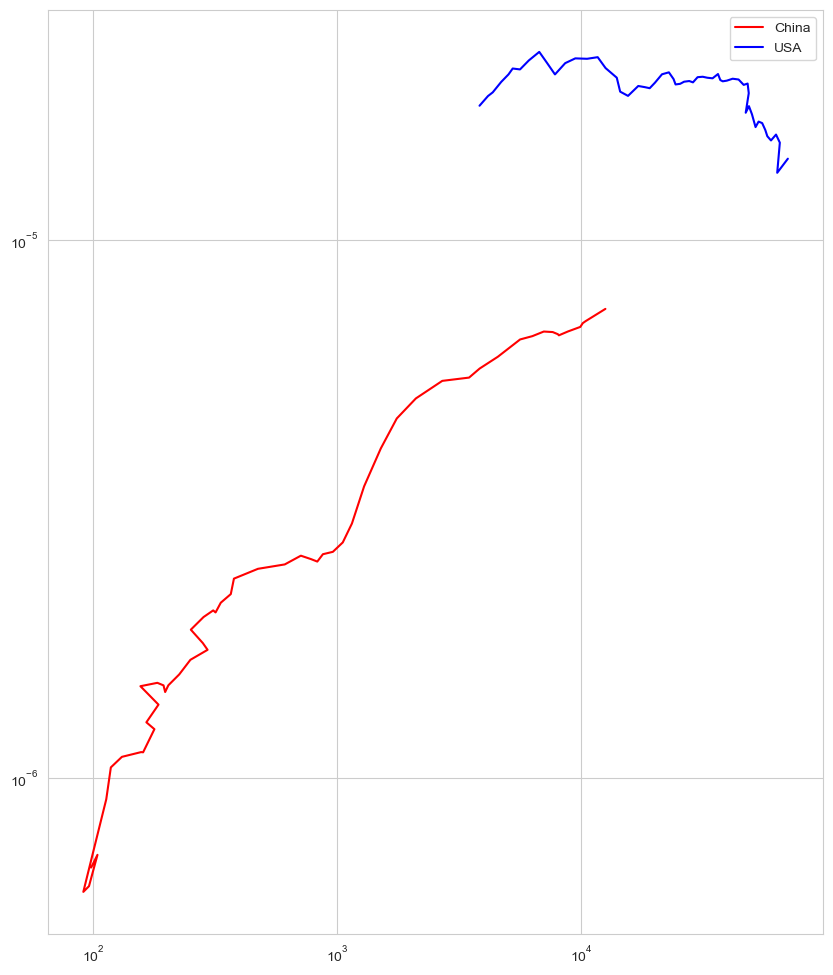

In [41]:
import matplotlib.pyplot as plt


year = np.array(dfCHN.Year)
chngdp = np.array(dfCHN.GDP)
usagdp = np.array(dfUSA.GDP)
chnco2 = np.array(dfCHN.CO2/dfCHN.Population)
usaco2 = np.array(dfUSA.CO2/dfUSA.Population)
print(chnco2,usaco2)
plt.figure(figsize=(10,12))
plt.plot(chngdp,chnco2,color='red',label='China' )
plt.plot(usagdp,usaco2,color='blue',label='USA' )
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

<Figure size 1000x800 with 0 Axes>

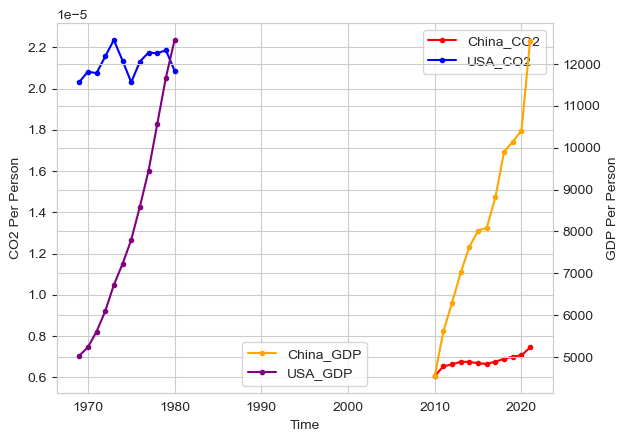

In [49]:
dfCHN1 = dfCHN.loc[range(11,-1,-1)]
dfUSA1 = dfUSA.loc[range(52,40,-1)]
year_ = np.array(range(12))
year1 = np.array(dfCHN1.Year)
year2 = np.array(dfUSA1.Year)
CHNCO2 = np.array(dfCHN1.CO2/dfCHN1.Population)
USACO2 = np.array(dfUSA1.CO2/dfUSA1.Population)
chngdp1 = np.array(dfCHN1.GDP)
usagdp1 = np.array(dfUSA1.GDP)

plt.figure(figsize=(10,8))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Time')
ax1.set_ylabel('CO2 Per Person')
ax1.plot(year_,CHNCO2,color='red',label='China_CO2',marker = '.' )
ax1.plot(year_,USACO2,color='blue',label='USA_CO2' ,marker = '.' )
ax2 = ax1.twinx()
ax2.set_ylabel('GDP Per Person')

ax2.plot(year_,chngdp1,color='orange',label='China_GDP',marker = '.'  )
ax2.plot(year_,usagdp1,color='purple',label='USA_GDP',marker = '.'  )
ax1.legend()
ax2.legend()
plt.show()